In [9]:
import pandas as pd
import plotly.express as px
import datetime
from datetime import datetime

In [10]:
main_df = pd.read_csv('/Users/ilya/Desktop/Computer-Science/Projects/Kepler/data/all_listings.csv', index_col = False)

## trimming size and price columns
main_df.loc[:,('size_sqm')] = [int(x.replace(' sqm', '')) for x in main_df['size']]
main_df.loc[:,('price')] = main_df['price'].astype('int')
main_df.loc[:,('price_per_sqm')] = round(main_df['price']/main_df['size_sqm'])

## converting date_posted to datetime type
main_df.loc[:,('date_posted')] = [x.split(', ')[0]+' '+x.split(', ')[1] for x in main_df['posted_time']]
main_df.loc[:,('date_posted')] = [datetime.strptime(x, '%B %d %Y') for x in main_df['date_posted']]

##taking out the mins as an integer from metro_proxim string
main_df.loc[:,('metro_min_walk')] = [int(x.split(' ', 1)[0]) for x in main_df['metro_proxim']]

##a few week-based (presumably "short-term") listings that we do not need
main_df.loc[:,('period')] = [x.replace('/ ', '') for x in main_df['period']]
main_df = main_df[main_df['period'] != 'Week']
main_df

## dropping redundant columns
main_df = main_df.drop(columns = ['property_type','currency','bedrooms','bathrooms','size','posted_time','metro_proxim', 'period','furnished','comission'])
main_df

,id,description,price,floor,windows,district,area,metro,list_source,size_sqm,price_per_sqm,date_posted,metro_min_walk
0,1447763,Bright 1Br+Yard @ L1/10/12 Shanxi rd station,8500,1,South,Xuhui,-,South Shaanxi Rd,Agent,50,170.0,2021-08-18,5
1,1448399,"Elevator 1Br/1Lr/1Bt apt nr Jiangsu rd,Line2/3...",8000,7,South,Changning,-,Jiangsu Rd,Agent,50,160.0,2021-08-21,6
2,1448398,Jiaotong Uni. 1bed nice style historical street,15120,2,South,Changning,-,Jiaotong University,Agent,70,216.0,2021-08-21,10
3,1448395,65sqm 1br Apartments/ChangPing Rd Area/Fully E...,12000,5,South,Jing'an District,-,Wuning Rd,Agent,65,185.0,2021-08-21,5
4,1448394,Nice 1br Apartment @Nanjing West Road,9500,4,South,Jing'an District,-,West Nanjing Rd,Agent,60,158.0,2021-08-21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,1442833,One bedroom near jiangsu rd station,8500,4,South,Changning,Zhongshan Park,Jiangsu Rd,Agent,55,155.0,2021-07-23,10
2034,1442828,Jing'an Changping Rd. elevator 1bed,10500,14,South,Jing'an District,Jing'an Temple,Changping Rd,Agent,65,162.0,2021-07-23,10
2035,1442826,One bedroom near jiaotong university station,8000,5,South,Changning,-,Jiaotong University,Agent,50,160.0,2021-07-23,10
2036,1442823,4.5 m ceiling at Yongjia road only 8K@hengshan...,8000,3,South,Huangpu,People's Square,Hengshan Rd,Agent,60,133.0,2021-07-23,5


In [11]:
## removing outliers by size and price

main_df = main_df[main_df['size_sqm'] <= main_df['size_sqm'].mean()+main_df['size_sqm'].std()*3]
main_df = main_df[main_df['price'] <= main_df['price'].mean()+main_df['price'].std()*3]
main_df = main_df[main_df['price_per_sqm'] <= main_df['price_per_sqm'].mean()+3*main_df['price_per_sqm'].std()]

### a most certain mistake in sqm size when you look at the actual listing
main_df = main_df[main_df['id'] != 1446245]

print("Number of listings in the finalized dataset: {}".format(len(main_df)))

Number of listings in the finalized dataset: 2007


In [12]:
price_df = main_df[['id','price','size_sqm','price_per_sqm']]
price_df.head(4)

,id,price,size_sqm,price_per_sqm
0,1447763,8500,50,170.0
1,1448399,8000,50,160.0
2,1448398,15120,70,216.0
3,1448395,12000,65,185.0


In [13]:
## monthly rent fee descriptive stats

print("Minimum: {}".format(round(price_df['price'].min())))
print("Maximum: {}".format(round(price_df['price'].max())))
print("Mean: {}".format(round(price_df['price'].mean())))
print("Median: {}".format(price_df['price'].quantile(q = 0.5)))
print("10th Percentile Value: {}".format(price_df['price'].quantile(q = 0.1)))
print("90th Percentile Value: {}".format(price_df['price'].quantile(q = 0.9)))

Minimum: 3200
Maximum: 23000
Mean: 10449
Median: 9800.0
10th Percentile Value: 6800.0
90th Percentile Value: 15000.0


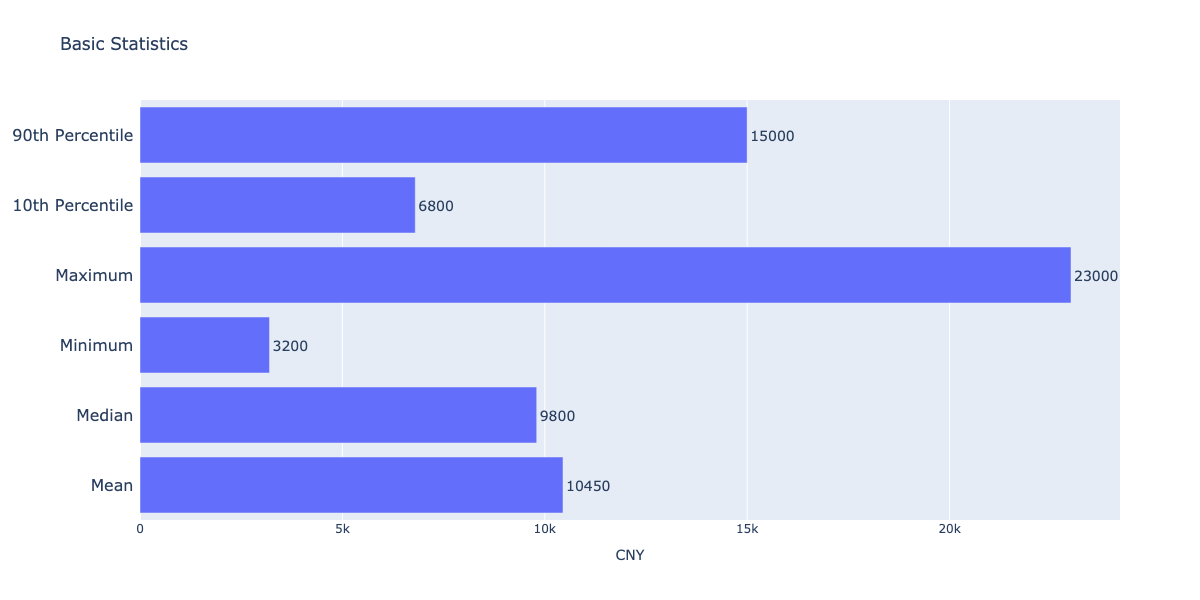

In [14]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=[10450, 9800, 3200, 23000, 6800, 15000],
            y=['Mean ','Median ','Minimum ','Maximum ','10th Percentile ','90th Percentile '],
            text = [10450, 9800, 3200, 23000, 6800, 15000],
            orientation='h'))

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',
                  textfont_size=14)

fig.update_layout(title_text = 'Basic Statistics', xaxis_title = 'CNY',
                         height = 600, width = 1200, yaxis = dict(tickfont = dict(size=16)))

fig.show("png", height = 600, width = 1200)

In [16]:
price_df.loc[:,('price_bin')] = ['a_7000' if 0 <= x <= 7000 else
                                 'b_7001-8000' if 7001 <= x <= 8000 else
                                 'c_8001_9000' if 8001 <= x <= 9000 else
                                 'd_9001_10001' if 9001 <= x <= 10000 else
                                 'e_10001_11001' if 10001 <= x <= 11000 else
                                 'f_11001_12000' if 11001 <= x <= 12000 else
                                 'g_12001_13000' if 12001 <= x <= 13000 else
                                 'h_13001_14000' if 13001 <= x <= 14000 else
                                 'i_14001_15000' if 14001 <= x <= 15000 else
                                 'j_15001' for x in price_df['price']]

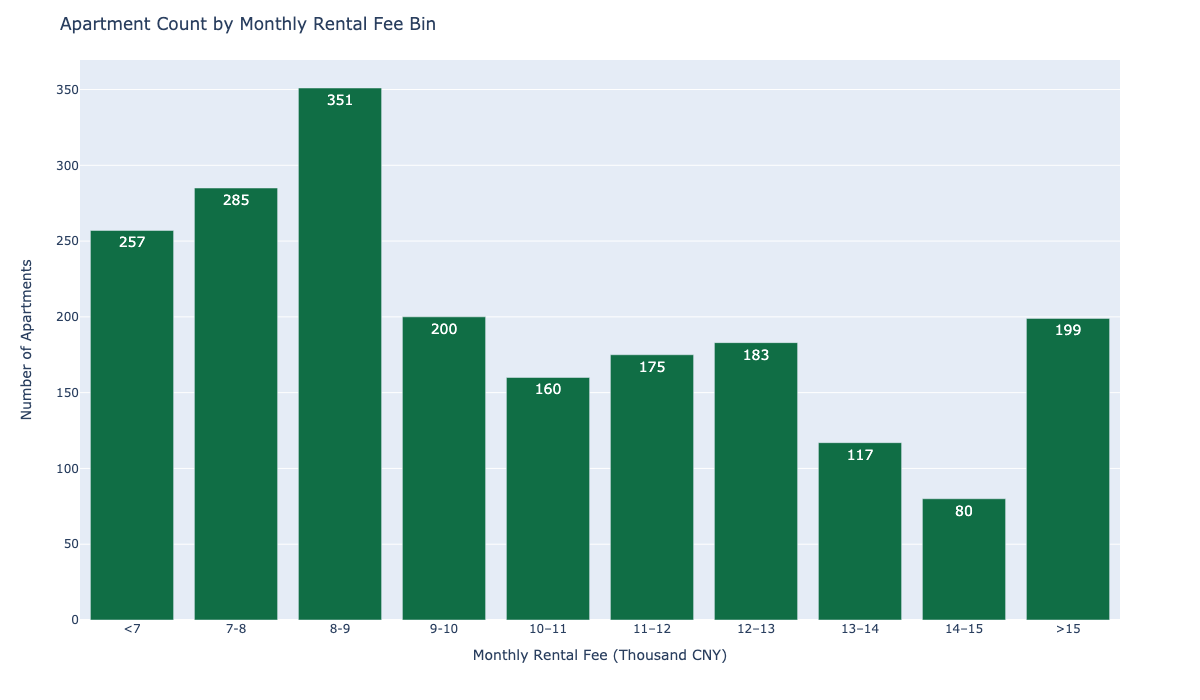

In [17]:
price_stats_df = price_df.groupby('price_bin').count().reset_index().rename(columns = {'id':'apartment_count'})[['price_bin','apartment_count']]

fig = px.bar(price_stats_df,
             x="price_bin",
             y="apartment_count",
             text='apartment_count')

fig.update_traces(textposition='inside',
                  texttemplate='%{text}',
                  marker_color='#106e45',
                  textfont_size=14)

fig.update_layout(title_text = 'Apartment Count by Monthly Rental Fee Bin',
                  yaxis_title = 'Number of Apartments',
                  xaxis_title = 'Monthly Rental Fee (Thousand CNY)',
                  height = 700, width = 1200)

for idx in range(len(fig.data)):
    fig.data[idx].x = ['<7','7-8','8-9','9-10','10–11','11–12','12–13','13–14','14–15','>15']

fig.show("png",height = 700, width = 1200)

Correlation between price and size:              price  size_sqm
price     1.000000  0.750504
size_sqm  0.750504  1.000000


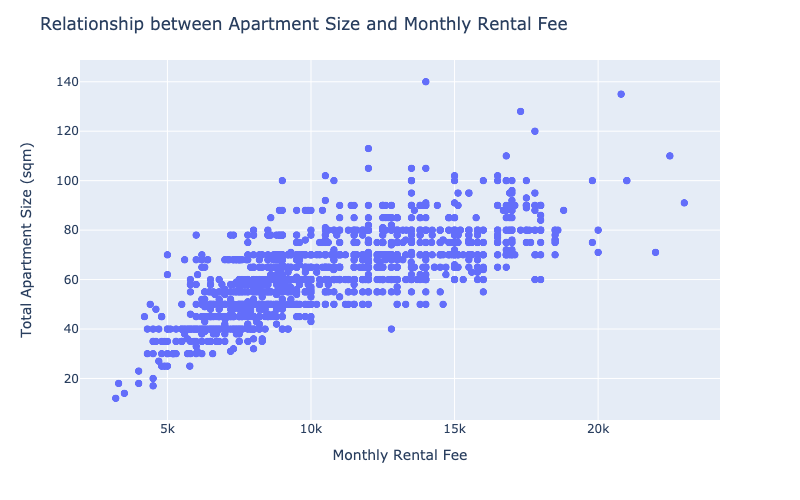

In [18]:
print("Correlation between price and size: {}".format(price_df[['price','size_sqm']].corr()))

fig = px.scatter(price_df[['price','size_sqm']],
             x="price",
             y="size_sqm")

fig.update_layout(title_text = 'Relationship between Apartment Size and Monthly Rental Fee',
                  yaxis_title = 'Total Apartment Size (sqm)',
                  xaxis_title = 'Monthly Rental Fee',
                  height = 500, width = 800)

fig.show("png",height = 500, width = 800)             

In [19]:
##rent fee per sqm descriptive stats

print("Minimum: {}".format(round(price_df['price_per_sqm'].min())))
print("Maximum: {}".format(round(price_df['price_per_sqm'].max())))
print("Mean: {}".format(round(price_df['price_per_sqm'].mean())))
print("Median: {}".format(price_df['price_per_sqm'].quantile(q = 0.5)))
print("10th Percentile Value: {}".format(price_df['price_per_sqm'].quantile(q = 0.1)))
print("90th Percentile Value: {}".format(price_df['price_per_sqm'].quantile(q = 0.9)))

Minimum: 71
Maximum: 320
Mean: 169
Median: 167.0
10th Percentile Value: 131.0
90th Percentile Value: 214.0


In [22]:
price_df.loc[:,('price_per_sqm_bin')] = ['a_130' if 0 <= x <= 130 else
                                         'b_131_140' if 131 <= x <= 140 else
                                         'c_141_150' if 141 <= x <= 150 else
                                         'd_151_160' if 151 <= x <= 160 else
                                         'e_161_170' if 161 <= x <= 170 else
                                         'f_171_180' if 171 <= x <= 180 else
                                         'g_181_190' if 181 <= x <= 190 else
                                         'h_191_200' if 191 <= x <= 200 else
                                         'i_201_210' if 201 <= x <= 210 else
                                         'j_211' for x in price_df['price_per_sqm']]

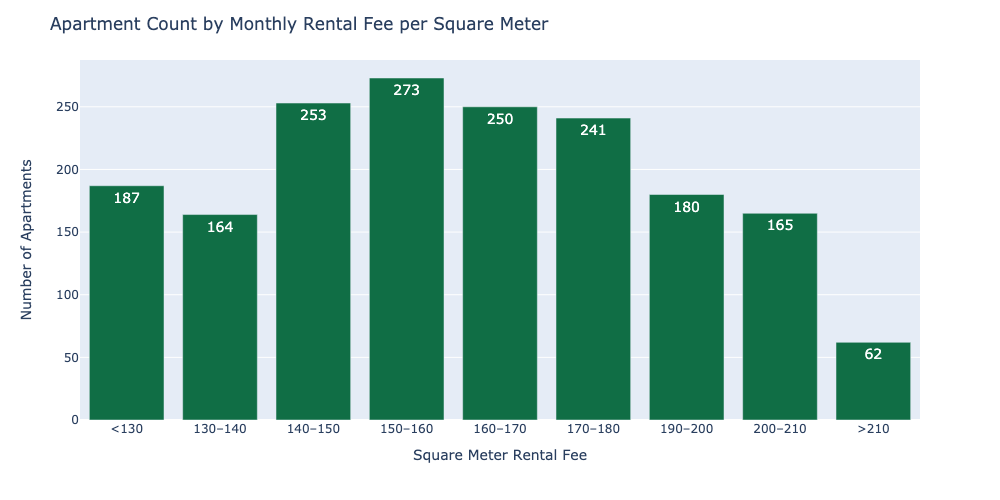

In [23]:
price_per_sqm_stats_df = price_df.groupby('price_per_sqm_bin').count().reset_index().\
                                  rename(columns = {'id':'apartment_count'})[['price_per_sqm_bin','apartment_count']]

fig = px.bar(price_per_sqm_stats_df,
             x="price_per_sqm_bin",
             y="apartment_count",
             text='apartment_count')

fig.update_traces(textposition='inside',
                  texttemplate='%{text}',
                  marker_color='#106e45',
                  textfont_size=14)

fig.update_layout(title_text = 'Apartment Count by Monthly Rental Fee per Square Meter',
                  yaxis_title = 'Number of Apartments',
                  xaxis_title = 'Square Meter Rental Fee',
                  height = 500, width = 1000)

for idx in range(len(fig.data)):
    fig.data[idx].x = ['<130','130–140','140–150','150–160','160–170','170–180','190–200','200–210','>210']

fig.show("png", height = 500, width = 1000)

# District

In [24]:
district_df = main_df[main_df['district'].isin(['Changning','Huangpu','Jing\'an District','Xuhui']) == True]
district_stats = district_df[['price','price_per_sqm','district']].groupby('district').mean()\
    .merge(district_df[['price','price_per_sqm','district']].groupby('district').count(), left_index = True, right_index = True)

district_stats = district_stats.rename(columns = {'price_x':'price','price_per_sqm_x':'price_per_sqm','price_y':'listing_count'})\
    .drop(columns = ['price_per_sqm_y']).reset_index().round()

district_stats

,district,price,price_per_sqm,listing_count
0,Changning,9425.0,161.0,502
1,Huangpu,10154.0,168.0,302
2,Jing'an District,11517.0,179.0,538
3,Xuhui,10697.0,171.0,583


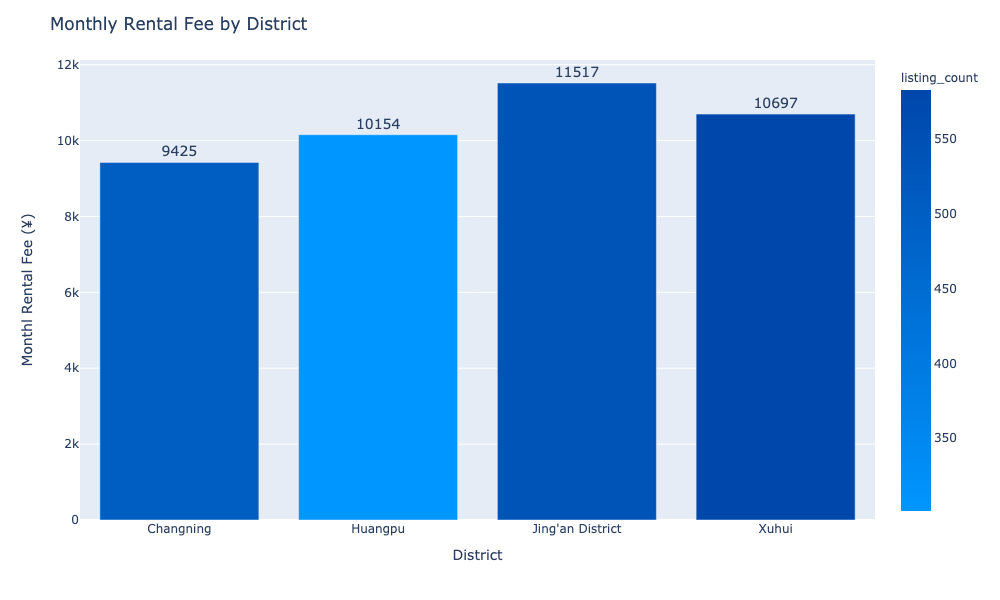

In [25]:
fig = px.bar(district_stats,
             x="district",
             y="price",
             text='price',
             color = 'listing_count',
             color_continuous_scale=['#0096FF','#0047AB'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',
                  #marker_color='#106e45',
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee by District',
                  yaxis_title = 'Monthl Rental Fee (¥)',
                  xaxis_title = 'District',
                  height = 600, width = 1000)

fig.show("png", height = 600, width = 1000)

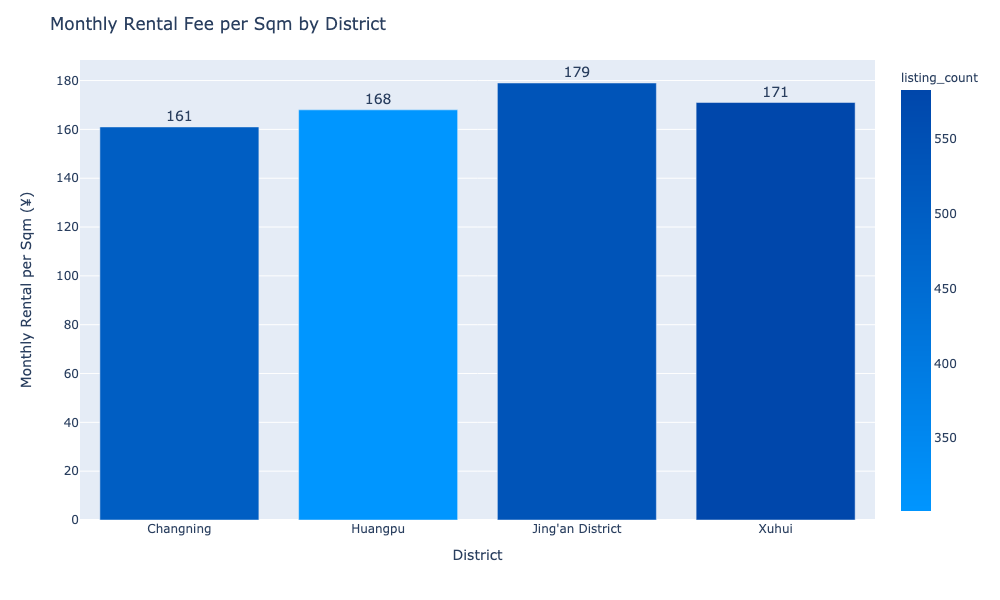

In [26]:
fig = px.bar(district_stats,
             x="district",
             y="price_per_sqm",
             text='price_per_sqm',
             color = 'listing_count',
             color_continuous_scale=['#0096FF','#0047AB'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',
                  #marker_color='#106e45',
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee per Sqm by District',
                  yaxis_title = 'Monthly Rental per Sqm (¥)',
                  xaxis_title = 'District',
                  height = 600, width = 800)

fig.show("png", height = 600, width = 1000)

# Floor

In [28]:
###grouping apartments by floor
main_df.loc[:,('floor_group')] = ['1st' if int(x) == 1 else '2nd' if int(x) == 2 else '3rd' if int(x) == 3 else 'high' for x in main_df['floor']]

floor_df = main_df[['price','price_per_sqm','floor_group']]

floor_stats = floor_df[['price','price_per_sqm','floor_group']].groupby('floor_group').mean()\
    .merge(floor_df[['price','price_per_sqm','floor_group']].groupby('floor_group').count(), left_index = True, right_index = True)

floor_stats = floor_stats.rename(columns = {'price_x':'price','price_per_sqm_x':'price_per_sqm','price_y':'listing_count'})\
                         .drop(columns = ['price_per_sqm_y']).reset_index().round()

floor_stats

,floor_group,price,price_per_sqm,listing_count
0,1st,10139.0,168.0,356
1,2nd,9843.0,165.0,341
2,3rd,10348.0,168.0,379
3,high,10831.0,172.0,931


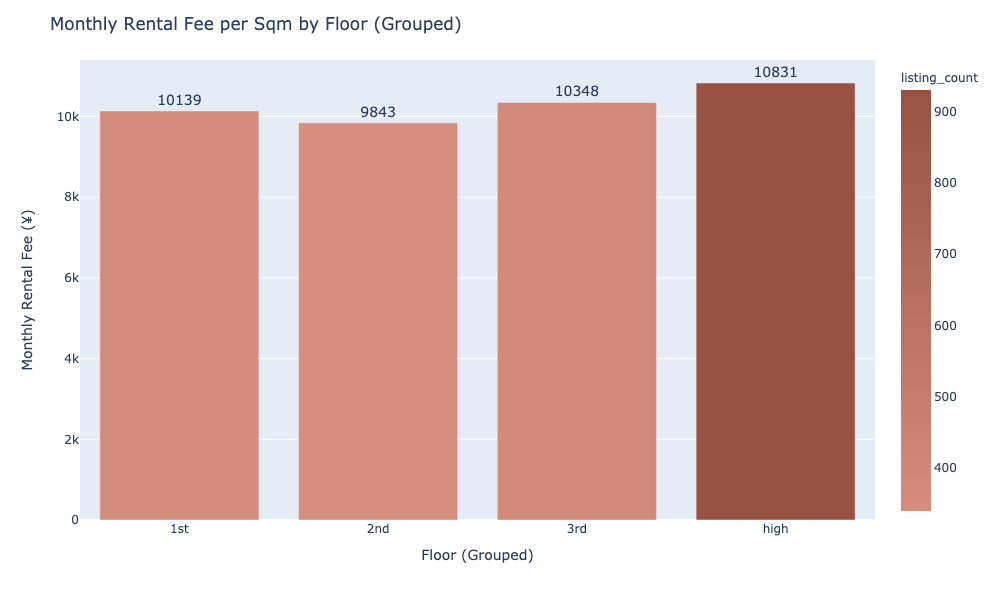

In [29]:
fig = px.bar(floor_stats,
             x="floor_group",
             y="price",
             text='price',
             color = 'listing_count',
             color_continuous_scale=['#D68E7E','#975243'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',   
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee per Sqm by Floor (Grouped)',
                  yaxis_title = 'Monthly Rental Fee (¥)',
                  xaxis_title = 'Floor (Grouped)',
                  height = 600, width = 800)

fig.show("png", height = 600, width = 1000)

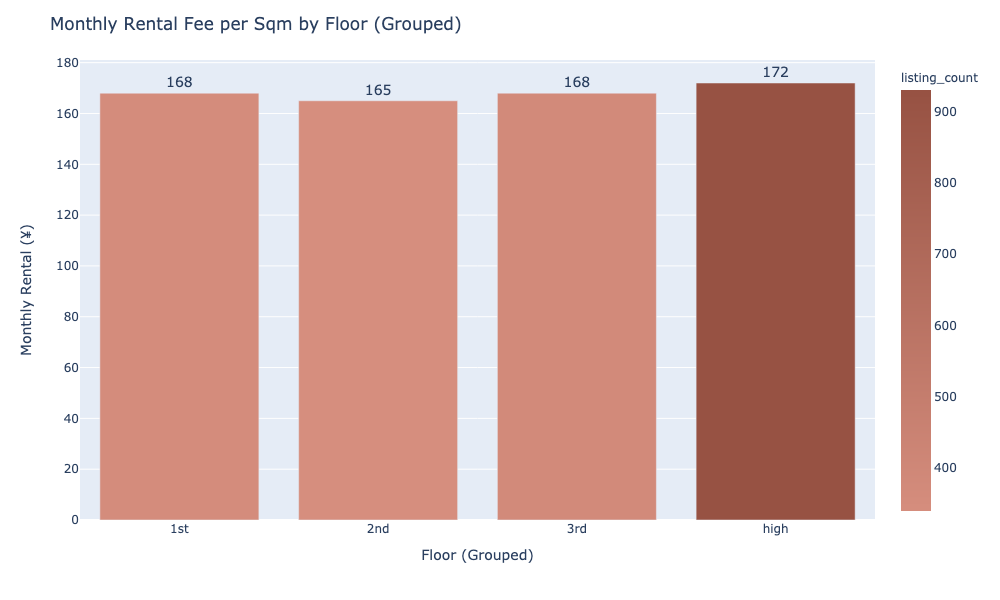

In [30]:
fig = px.bar(floor_stats,
             x="floor_group",
             y="price_per_sqm",
             text='price_per_sqm',
             color = 'listing_count',
             color_continuous_scale=['#D68E7E','#975243'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',   
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee per Sqm by Floor (Grouped)',
                  yaxis_title = 'Monthly Rental (¥)',
                  xaxis_title = 'Floor (Grouped)',
                  height = 600, width = 800)

fig.show("png", height = 600, width = 1000)

In [31]:
main_df.loc[:,('metro_min_walk_group')] = ['a_0_5' if 0 <= int(x) <= 5 else
                                           'b_6_10' if 6 <= int(x) <= 10 else
                                           'c_11_15' if 11 <= int(x) <= 15 else
                                           'd_16_20' if 16 <= int(x) <= 20 else
                                           'e_21_25' if 21 <= int(x) <= 25 else
                                           'f_25_30' if 25 <= int(x) <= 30 else
                                           'f_31+' for x in main_df['metro_min_walk']]

metro_df = main_df[['price','price_per_sqm','metro_min_walk_group']]

metro_stats = metro_df[['price','price_per_sqm','metro_min_walk_group']].groupby('metro_min_walk_group').mean()\
    .merge(metro_df[['price','price_per_sqm','metro_min_walk_group']].groupby('metro_min_walk_group').count(), left_index = True, right_index = True)

metro_stats = metro_stats.rename(columns = {'price_x':'price','price_per_sqm_x':'price_per_sqm','price_y':'listing_count'})\
                         .drop(columns = ['price_per_sqm_y']).reset_index().round()

metro_stats

,metro_min_walk_group,price,price_per_sqm,listing_count
0,a_0_5,10456.0,168.0,1019
1,b_6_10,10426.0,170.0,918
2,c_11_15,10541.0,173.0,66
3,d_16_20,12050.0,202.0,2
4,f_25_30,11800.0,174.0,1
5,f_31+,14000.0,233.0,1


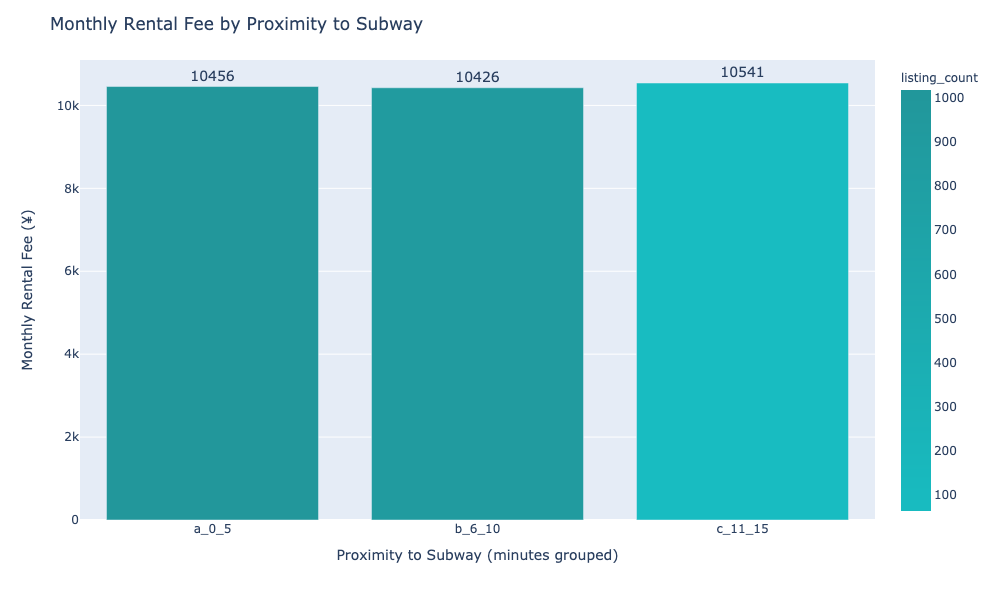

In [32]:
fig = px.bar(metro_stats[metro_stats['metro_min_walk_group'].isin(['a_0_5','b_6_10','c_11_15'])],
             x="metro_min_walk_group",
             y="price",
             text='price',
             color = 'listing_count',
             color_continuous_scale=['#18BCC1','#22979B'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',   
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee by Proximity to Subway',
                  yaxis_title = 'Monthly Rental Fee (¥)',
                  xaxis_title = 'Proximity to Subway (minutes grouped)',
                  height = 600, width = 800)

fig.show(height = 600, width = 1000)

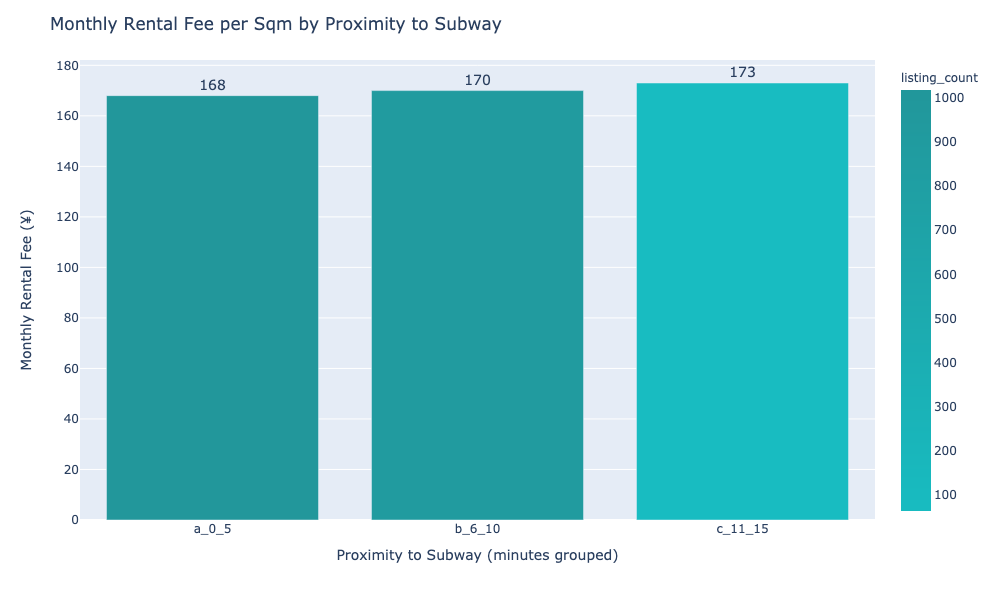

In [33]:
fig = px.bar(metro_stats[metro_stats['metro_min_walk_group'].isin(['a_0_5','b_6_10','c_11_15'])],
             x="metro_min_walk_group",
             y="price_per_sqm",
             text='price_per_sqm',
             color = 'listing_count',
             color_continuous_scale=['#18BCC1','#22979B'])

fig.update_traces(textposition='outside',
                  texttemplate='%{text}',   
                  textfont_size=14
                  )

fig.update_layout(title_text = 'Monthly Rental Fee per Sqm by Proximity to Subway',
                  yaxis_title = 'Monthly Rental Fee (¥)',
                  xaxis_title = 'Proximity to Subway (minutes grouped)',
                  height = 600, width = 800)

fig.show("png", height = 600, width = 1000)